In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plot

In [2]:
batch_size = 32

In [3]:
train_datasets = datasets.MNIST(root='../../MNIST_data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_datasets,
                                          batch_size=batch_size,
                                          shuffle=True)

In [4]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.hidden = nn.Linear(100, 128)
        self.out = nn.Linear(128, 784)
    
    def forward(self, x):
        h1 = F.relu(self.hidden(x))
        out = F.sigmoid(self.out(h1))
        return out

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.hidden = nn.Linear(784, 128)
        self.out = nn.Linear(128, 1)
    
    def forward(self, x):
        h1 = F.relu(self.hidden(x))
        out = F.sigmoid(self.out(h1))
        return out

In [6]:
generator = Generator()
discriminator = Discriminator()

In [7]:
# discriminator_real.parameters()
d_optimizer = optim.Adam(discriminator.parameters(),
                        lr=0.0001)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0001)

In [8]:
def plot_images(samples):
    fig = plot.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plot.subplot(gs[i])
        plot.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plot.imshow(sample.data.numpy().reshape(28, 28), cmap='Greys_r')

    return fig

In [9]:
labels_zeros = Variable(torch.zeros(batch_size))
labels_ones = Variable(torch.ones(batch_size))
def train():
    for idx, (data, target) in enumerate(train_loader):
        batch, _ = Variable(data), target
        sample = Variable(torch.randn(batch_size, 100))
        
        batch = batch.view(batch_size, 784)
        
        gen_sample = generator.forward(sample)
        disc_real = discriminator.forward(batch)
        disc_fake = discriminator.forward(gen_sample)
        
        disc_loss = nn.functional.binary_cross_entropy(disc_fake, labels_zeros) \
                    + nn.functional.binary_cross_entropy(disc_real, labels_ones)
        
        disc_loss.backward()
        d_optimizer.step()

        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        
        sample = Variable(torch.randn(batch_size, 100))
        
        gen_sample = generator.forward(sample)
        disc_fake = discriminator.forward(gen_sample)

        gen_loss = nn.functional.binary_cross_entropy(disc_fake, labels_ones)
        
        gen_loss.backward()
        g_optimizer.step()
        
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        
        
        if idx % 100 == 0:
            print('Iter: {} = Discriminator Loss: {}, Generator Loss: {}'.format(idx, disc_loss, gen_loss))
            
            samples = generator.forward(Variable(torch.randn(16, 100)))
            fig = plot_images(samples)
            plot.show()
            plot.close(fig)

/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:1168: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Iter: 0 = Discriminator Loss: Variable containing:
 1.4164
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 0.7796
[torch.FloatTensor of size 1]



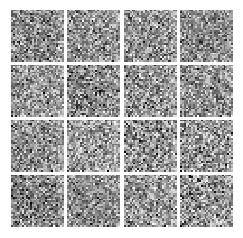

Iter: 100 = Discriminator Loss: Variable containing:
 0.2226
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.9314
[torch.FloatTensor of size 1]



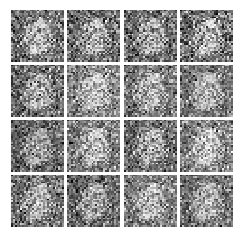

Iter: 200 = Discriminator Loss: Variable containing:
 0.1569
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 3.5450
[torch.FloatTensor of size 1]



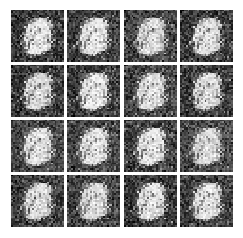

Iter: 300 = Discriminator Loss: Variable containing:
 0.2237
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 3.7935
[torch.FloatTensor of size 1]



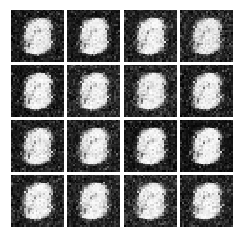

Iter: 400 = Discriminator Loss: Variable containing:
 0.4309
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 3.7934
[torch.FloatTensor of size 1]



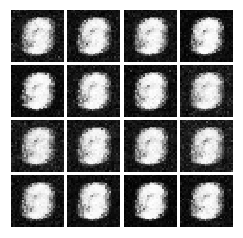

Iter: 500 = Discriminator Loss: Variable containing:
 0.4808
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.5051
[torch.FloatTensor of size 1]



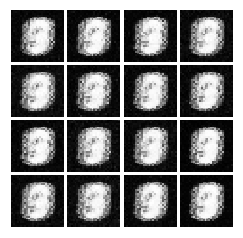

Iter: 600 = Discriminator Loss: Variable containing:
 0.5979
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.2596
[torch.FloatTensor of size 1]



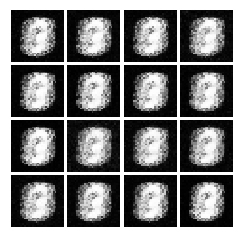

Iter: 700 = Discriminator Loss: Variable containing:
 0.5414
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9850
[torch.FloatTensor of size 1]



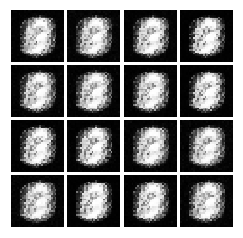

Iter: 800 = Discriminator Loss: Variable containing:
 0.6016
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9911
[torch.FloatTensor of size 1]



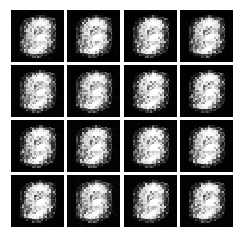

Iter: 900 = Discriminator Loss: Variable containing:
 0.5773
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9255
[torch.FloatTensor of size 1]



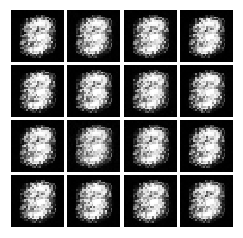

Iter: 1000 = Discriminator Loss: Variable containing:
 0.5382
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.8023
[torch.FloatTensor of size 1]



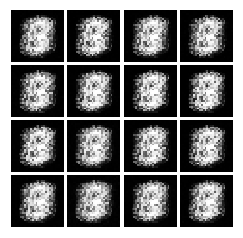

Iter: 1100 = Discriminator Loss: Variable containing:
 0.4725
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.8908
[torch.FloatTensor of size 1]



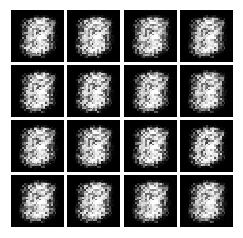

Iter: 1200 = Discriminator Loss: Variable containing:
 0.4079
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.0991
[torch.FloatTensor of size 1]



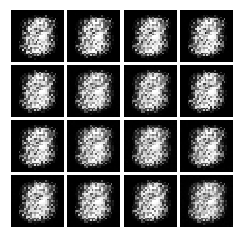

Iter: 1300 = Discriminator Loss: Variable containing:
 0.3683
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.1365
[torch.FloatTensor of size 1]



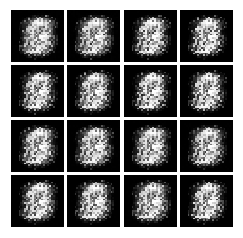

Iter: 1400 = Discriminator Loss: Variable containing:
 0.3694
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.0517
[torch.FloatTensor of size 1]



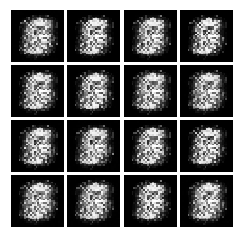

Iter: 1500 = Discriminator Loss: Variable containing:
 0.3955
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.0929
[torch.FloatTensor of size 1]



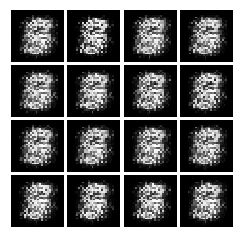

Iter: 1600 = Discriminator Loss: Variable containing:
 0.3348
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 2.0067
[torch.FloatTensor of size 1]



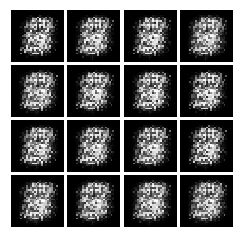

Iter: 1700 = Discriminator Loss: Variable containing:
 0.3594
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.8335
[torch.FloatTensor of size 1]



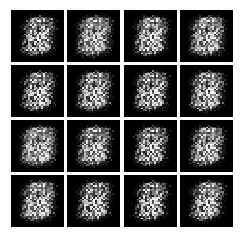

Iter: 1800 = Discriminator Loss: Variable containing:
 0.3408
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9737
[torch.FloatTensor of size 1]



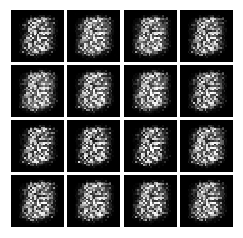

Iter: 0 = Discriminator Loss: Variable containing:
 0.3379
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.9707
[torch.FloatTensor of size 1]



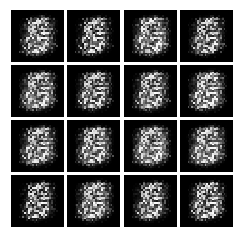

Iter: 100 = Discriminator Loss: Variable containing:
 0.3956
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.8202
[torch.FloatTensor of size 1]



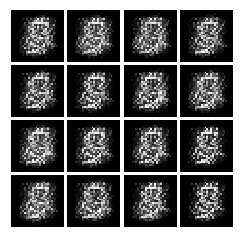

Iter: 200 = Discriminator Loss: Variable containing:
 0.5228
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.6035
[torch.FloatTensor of size 1]



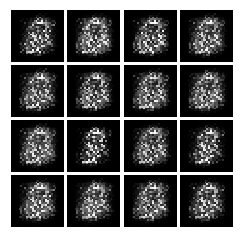

Iter: 300 = Discriminator Loss: Variable containing:
 0.5304
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.6450
[torch.FloatTensor of size 1]



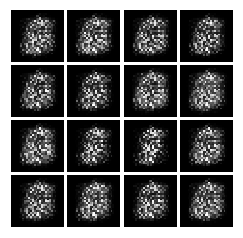

Iter: 400 = Discriminator Loss: Variable containing:
 0.4831
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.3426
[torch.FloatTensor of size 1]



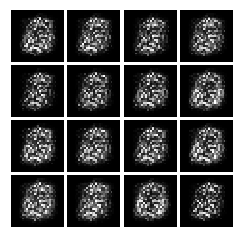

Iter: 500 = Discriminator Loss: Variable containing:
 0.5665
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.4175
[torch.FloatTensor of size 1]



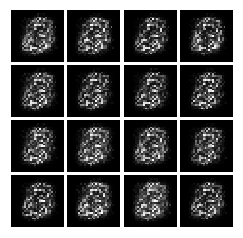

Iter: 600 = Discriminator Loss: Variable containing:
 0.6787
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.2179
[torch.FloatTensor of size 1]



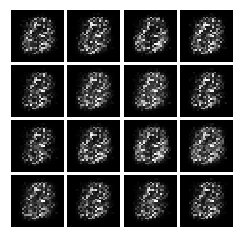

Iter: 700 = Discriminator Loss: Variable containing:
 0.7303
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.1601
[torch.FloatTensor of size 1]



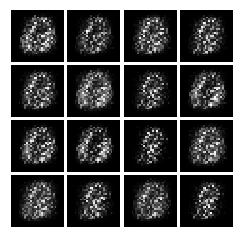

Iter: 800 = Discriminator Loss: Variable containing:
 0.5124
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.0945
[torch.FloatTensor of size 1]



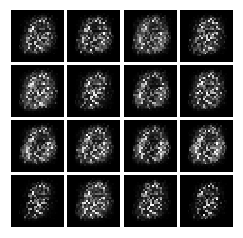

Iter: 900 = Discriminator Loss: Variable containing:
 0.6535
[torch.FloatTensor of size 1]
, Generator Loss: Variable containing:
 1.2341
[torch.FloatTensor of size 1]



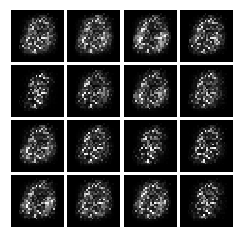

In [ ]:
for e in range(100):
    train()